In [36]:
import numpy as np
import pandas as pd
from datetime import datetime
import calendar
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [19]:
train.shape

(10886, 12)

In [20]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [22]:
train['tempDate'] = train.datetime.apply(lambda x:x.split())

train['date'] = train['tempDate'].apply(lambda x: x[0])     
train['year'] = train['tempDate'].apply(lambda x: x[0].split('-')[0])
train['month'] = train['tempDate'].apply(lambda x: x[0].split('-')[1])
train['day'] = train['tempDate'].apply(lambda x: x[0].split('-')[2])
train['hour'] = train['tempDate'].apply(lambda x: x[1].split(':')[0])
train['minute'] = train['tempDate'].apply(lambda x: x[1].split(':')[1])
train['second'] = train['tempDate'].apply(lambda x: x[1].split(':')[2])
train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0], "%Y-%m-%d").weekday()])

train = train.drop('tempDate', axis=1)

In [24]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


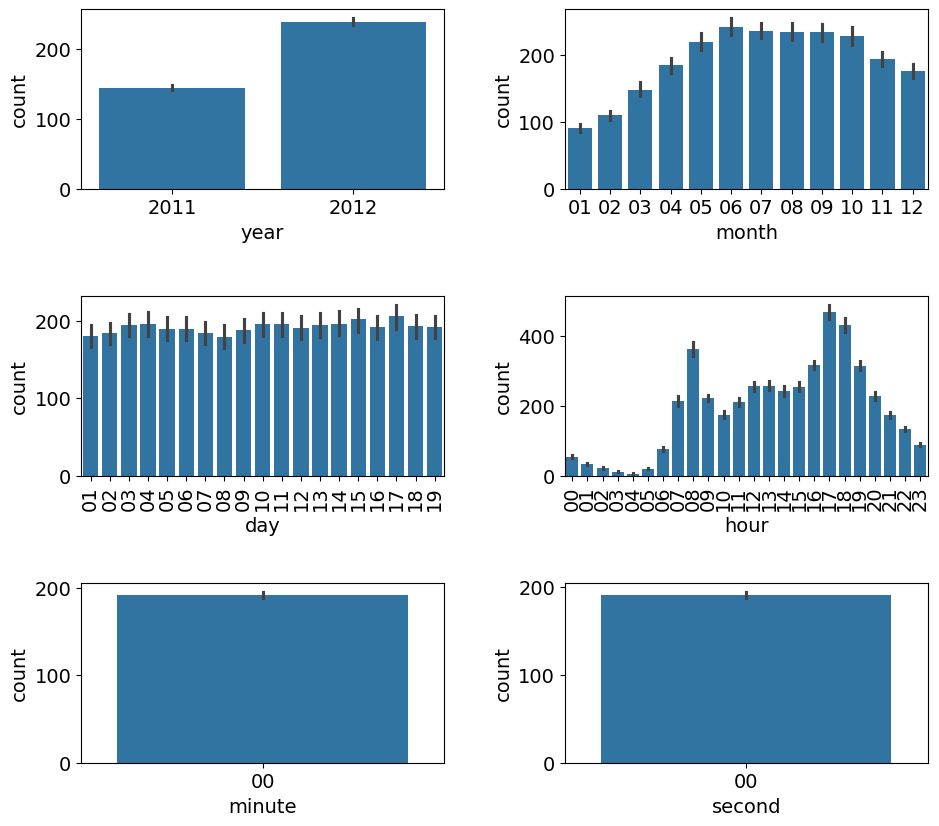

In [27]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=5)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)


In [28]:
# minute / seconde feature 는 아무 데이터도 담고 있지 않음 => 삭제

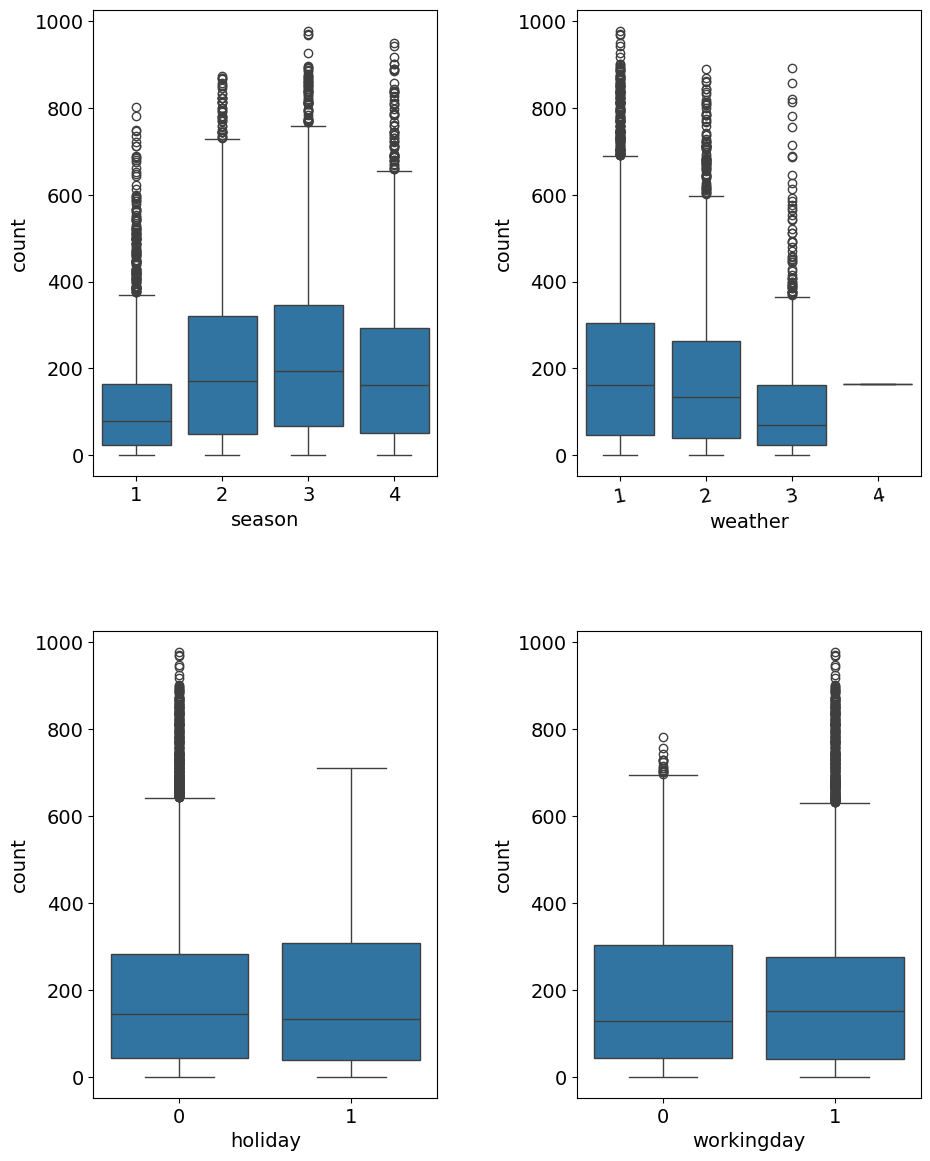

In [29]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,13)

sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1])

axes[0, 1].tick_params(axis='x', labelrotation=10)

<Axes: xlabel='hour', ylabel='count'>

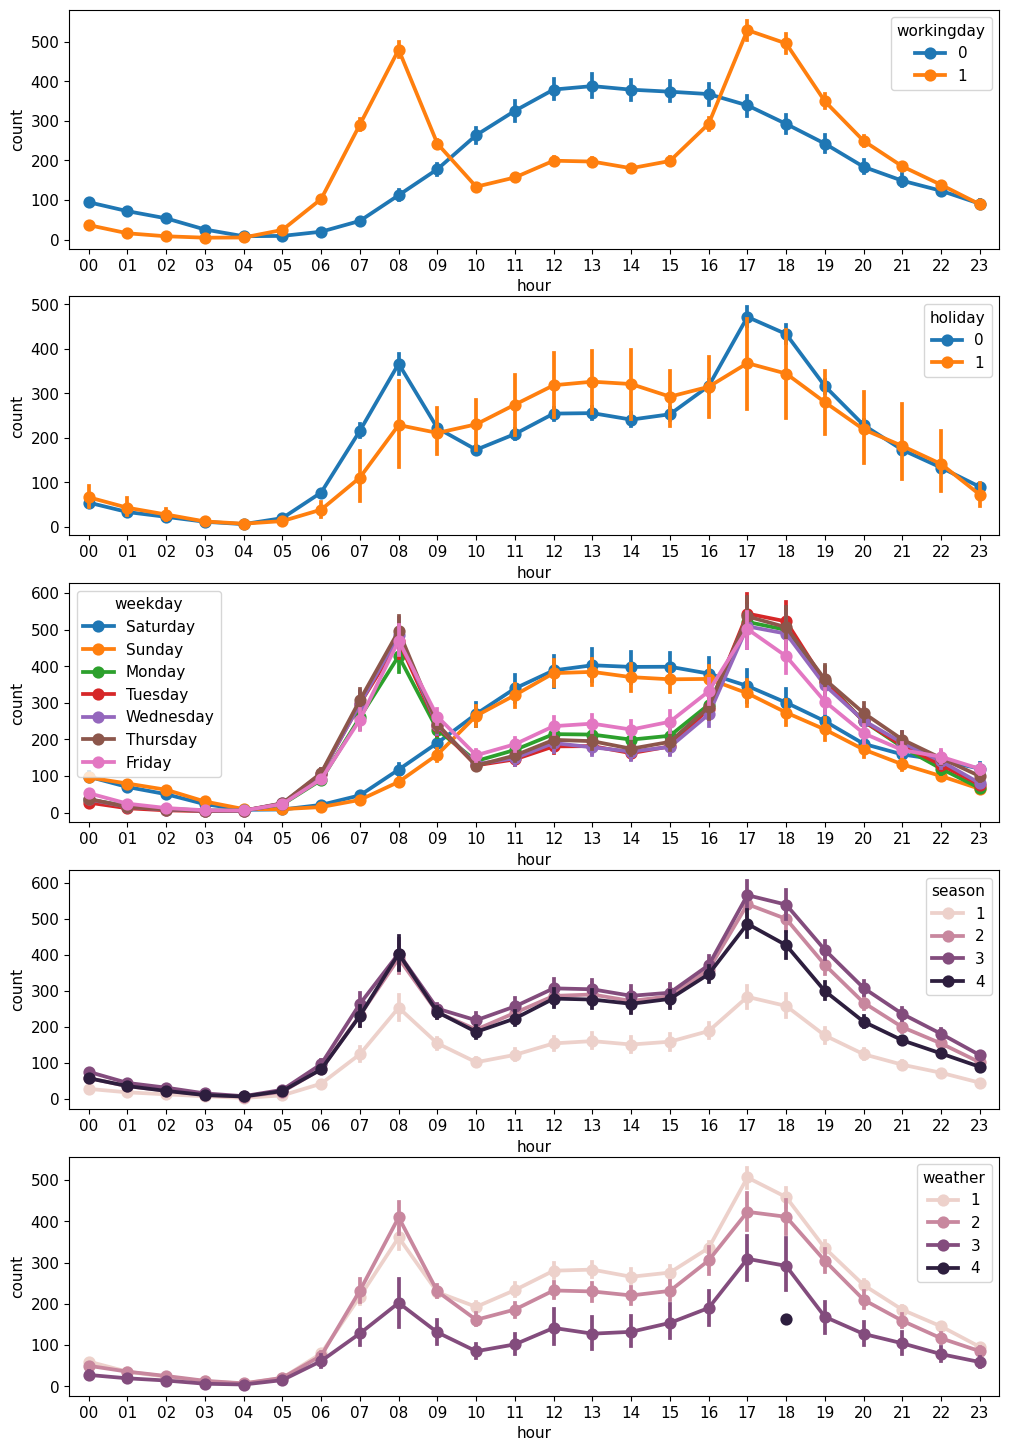

In [30]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12,18)

sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'workingday', ax = axes[0])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'holiday', ax = axes[1])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weekday', ax = axes[2])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'season', ax = axes[3])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weather', ax = axes[4])

<Axes: xlabel='humidity', ylabel='count'>

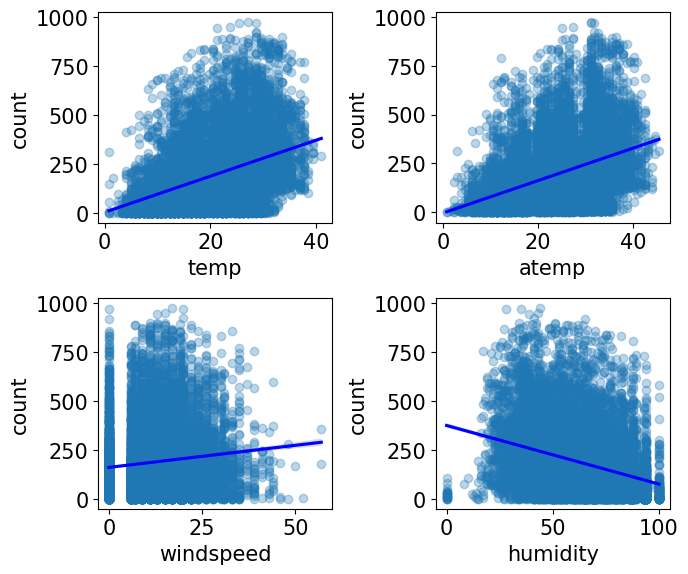

In [31]:
mpl.rc('font', size = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(7,6)

sns.regplot(x = 'temp', y = 'count', data = train, ax = axes[0,0], scatter_kws= {'alpha': 0.3}, line_kws={'color': 'blue'})
sns.regplot(x = 'atemp', y = 'count', data = train, ax = axes[0,1], scatter_kws= {'alpha': 0.3}, line_kws={'color': 'blue'})
sns.regplot(x = 'windspeed', y = 'count', data = train, ax = axes[1,0], scatter_kws= {'alpha': 0.3}, line_kws={'color': 'blue'})
sns.regplot(x = 'humidity', y = 'count', data = train, ax = axes[1,1], scatter_kws= {'alpha': 0.3}, line_kws={'color': 'blue'})

In [32]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


<Axes: >

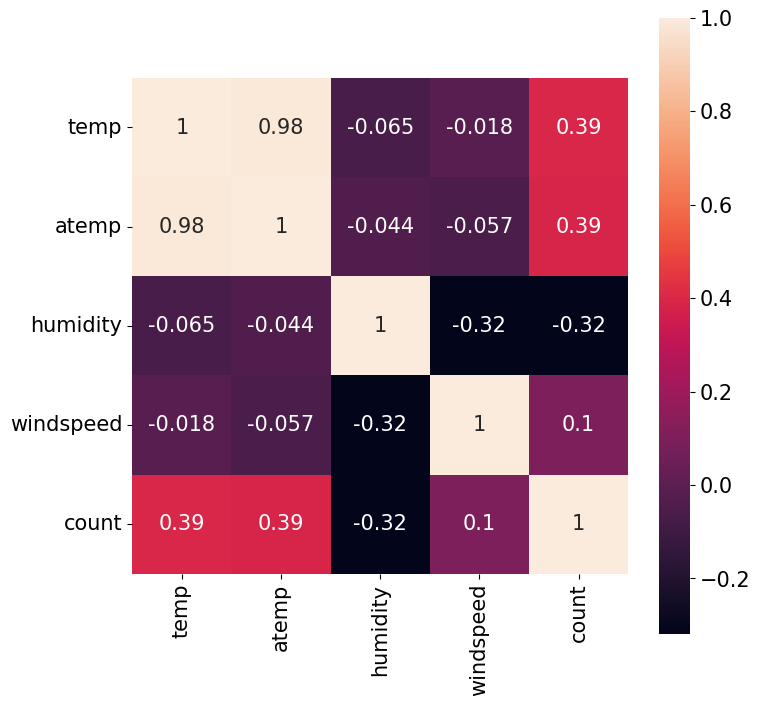

In [33]:
fig = plt.figure(figsize=[8,8])
corr = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(corr, annot=True, square=True, cbar=True)

In [34]:
# minute, second 는 어떤 정보도 담고 있지 않음
# pointplot 그래프에서 weather 4 는 outlier 로 확인됨

# windspeed 는 0인 값이 많고 값이 연속적이지 않기 때문에 정확하지 않은 데이터로 추정됨
# => 제거하거나 다른 값으로 대체 필요
train = train.drop(['windspeed', 'minute', 'second'], axis=1)
train = train[train['weather'] != 4]

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,casual,registered,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,3,13,16,2011-01-01,2011,01,01,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,8,32,40,2011-01-01,2011,01,01,01,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,5,27,32,2011-01-01,2011,01,01,02,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,3,10,13,2011-01-01,2011,01,01,03,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,1,1,2011-01-01,2011,01,01,04,Saturday
